## 1. Covid Data : New Cases per County

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
#Info about daily new Covid Cases per County from Texas Health Department 
df_county_covid=pd.read_csv('../data/CountyCovidCases012421.csv')
print(df_county_covid.shape)
df_county_covid.tail()

(256, 325)


,County,New Cases 03-04-2020,New Cases 03-05-2020,New Cases 03-06-2020,New Cases 03-09-2020,New Cases 03-10-2020,New Cases 03-11-2020,New Cases 03-12-2020,New Cases 03-13-2020,New Cases 03-15-2020,...,New Cases 01-15-2021,New Cases 01-16-2021,New Cases 01-17-2021,New Cases 01-18-2021,New Cases 01-19-2021,New Cases 01-20-2021,New Cases 01-21-2021,New Cases 01-22-2021,New Cases 01-23-2021,New Cases 01-24-2021
251,Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,14.0,0.0,0.0,0.0,70.0,11.0,7.0,15.0,0.0
252,Zapata,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,31.0,13.0,0.0,3.0,38.0,0.0,37.0,13.0,10.0
253,Zavala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,47.0,0.0,0.0,0.0,42.0,84.0,0.0,40.0,0.0
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Additional information can be found on the Dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get rid of the last two rows because they aren't associated with any county or any covid data
df_county_covid = df_county_covid[:254]
df_county_covid.shape

(254, 325)

In [5]:
# County Ids and County Names from Texas Department of Education
df_Counties = pd.read_csv('../data/Counties.csv')
df_counties = df_Counties.loc[:, 'FIPS':'FENAME']
df_counties['FENAME']=df_counties['FENAME'].str.capitalize()  # capitalize County names instead of all Caps
print(df_counties.shape)
df_counties.head()

(254, 2)


,FIPS,FENAME
0,111,Dallam
1,33,Borden
2,151,Fisher
3,421,Sherman
4,429,Stephens


In [6]:
#Prepare Merge both data frames so that we can have the county ID

#Change County name to all Uppercase to match the county Data
#df_county_covid['County']=df_county_covid['County'].str.upper();

#Change FENAME column to a string so we can compare to County column
df_counties.FENAME.astype(str);

# Merge the df with the added columns from County_Name on FIPS ... County Code
df_cases = pd.merge(left=df_county_covid, right=df_counties, left_on='County', right_on='FENAME')
df_cases.tail()

,County,New Cases 03-04-2020,New Cases 03-05-2020,New Cases 03-06-2020,New Cases 03-09-2020,New Cases 03-10-2020,New Cases 03-11-2020,New Cases 03-12-2020,New Cases 03-13-2020,New Cases 03-15-2020,...,New Cases 01-17-2021,New Cases 01-18-2021,New Cases 01-19-2021,New Cases 01-20-2021,New Cases 01-21-2021,New Cases 01-22-2021,New Cases 01-23-2021,New Cases 01-24-2021,FIPS,FENAME
228,Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,0.0,21.0,40.0,0.0,-1.0,4.0,499,Wood
229,Yoakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,26.0,0.0,501,Yoakum
230,Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,70.0,11.0,7.0,15.0,0.0,503,Young
231,Zapata,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,3.0,38.0,0.0,37.0,13.0,10.0,505,Zapata
232,Zavala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42.0,84.0,0.0,40.0,0.0,507,Zavala


In [7]:
# Do some df clean up by dropping a duplicate county column, reverting all caps County to capitals, updated columnnames to just dates.
df_cases.drop('FENAME', inplace=True, axis=1)
df_cases['County'] = df_cases['County'].str.capitalize() + ' County'
df_cases.rename(columns={'ounty': 'County', 'FIPS': 'CountyID'}) # to fix removing the Ounty
df_cases.columns = df_cases.columns.str.lstrip('New Cases ')
df_cases.rename(columns = {'ounty':'County'}, inplace = True) 
df_cases.head()

,County,03-04-2020,03-05-2020,03-06-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-15-2020,...,01-16-2021,01-17-2021,01-18-2021,01-19-2021,01-20-2021,01-21-2021,01-22-2021,01-23-2021,01-24-2021,FIPS
0,Anderson County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.0,0.0,0.0,71.0,-9.0,-3.0,17.0,0.0,1
1,Andrews County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,0.0,0.0,0.0,0.0,13.0,5.0,6.0,0.0,3
2,Angelina County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,117.0,0.0,0.0,40.0,0.0,0.0,5
3,Aransas County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,11.0,0.0,1.0,11.0,3.0,0.0,6.0,5.0,7
4,Archer County,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,9.0,3.0,5.0,3.0,0.0,9


In [8]:
# Since only have shutdown information from only a few of the 254 counties in TX
# There may be situations were we only want to look at the information for those counties

#import Shutdown Data from previous EDA
df_Shutdowns = pd.read_csv('../data/spec_county_shutdown_dates.csv')
shutdown_counties = df_Shutdowns['County']
#create list of counties that make up Texas cities and counties within major metroplex areas
demo_spec_counties =['Bell County','Bexar County','Bowie County','Brazoria County','Brazos County','Harris County','Castro County',
                 'Chambers County','Collin County','Comal County','Dallas County','Denton County','Ellis County','El Paso County']
mobility_spec_counties = ['Bastrop County','Bexar County','Caldwell County','Comal County','Guadalupe County','Hays County','Travis County','Williamson County',
    'Collin County', 'Dallas County', 'Denton County', 'Ellis County', 'Hood County', 'Hunt County', 'Johnson County', 'Kaufman County', 'Parker County', 'Rockwall County', 'Somervell County', 'Tarrant County', 'Wise County',
    'Austin County', 'Brazoria County', 'Chambers County', 'Fort Bend County', 'Galveston County', 'Harris County', 'Liberty County', 'Montgomery County', 'Waller County',
    'Atascosa County','Bandera County','Kendall County','Medina County','Wilson County']
#df_spec_cases= df_cases[df_cases['County'].isin(spec_counties)].reset_index(drop=True)



In [9]:
shutdown_counties

0          Bexar County
1       Brazoria County
2         Collin County
3          Comal County
4         Dallas County
5         Denton County
6      Fort Bend County
7         Harris County
8        Liberty County
9        Lubbock County
10        Nueces County
11       Tarrant County
12        Travis County
13    Williamson County
Name: County, dtype: object

In [10]:
#Melt the dataframe 
countyfips = ['County', 'FIPS']
Date = df_cases.columns.difference(countyfips)
df_county_cases = pd.melt(df_cases, id_vars=countyfips, var_name = 'Date', value_name ='New Cases')



In [11]:
#convert County to  string column
df_county_cases['County']=df_county_cases['County'].astype(str);
#convert Dates to datetime
df_county_cases['Date'] = pd.to_datetime(df_county_cases['Date'])


In [12]:
#mobility_metro = mobility_tx1.groupby(['metro_area', 'Destination','WeekNumber', 'Year'], as_index=False).agg({'PercentChange': "mean"})
county_covid = Spec_counties.groupby(['County', 'Date'], as_index=False)

NameError: name 'Spec_counties' is not defined

In [13]:
df_Shutdowns.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df_Shutdowns.columns

In [ ]:
res = min(df_Shutdowns.iloc[12:,1:7])

In [ ]:
df_Shutdowns.at[12, res]

In [14]:
# Add Percent change to determine for each county daily, what was the percent change of new covid cases compared to previous day.
df_county_cases['percent_change'] = df_county_cases.sort_values('Date').groupby(['County'])['New Cases'].pct_change()

In [ ]:
# For each county that has shutdown data, add whether or not the data was after a shutdown was declared 
#df_county_cases['Shutdown'] = 0
from datetime import datetime
earliest_date = []
for i in df_Shutdowns.index: 
    res = min(df_Shutdowns.iloc[i,1:])
    earliest_date.append(datetime.strptime(df_Shutdowns.at[i,res], '%d/%m/%y'))
df_Shutdowns['Earliest']= earliest_date
df_Shutdowns.head()
  

In [16]:
df_county_cases.sort_values(by=['County', 'Date'], inplace=True)
df_county_cases.reset_index();


In [17]:
#Partition data in terms of preshutdown data with shutdown and only shutdown data
FebApril_cases = df_county_cases[(df_county_cases['Date']>='2020-02-01') & (df_county_cases['Date']<'2020-05-01')].reset_index() 
Shutdown_cases = df_county_cases[(df_county_cases['Date']>='2020-03-01') & (df_county_cases['Date']<'2020-05-01')].reset_index() 


In [18]:
FebApril_Shutdown_cases = FebApril_cases[FebApril_cases['County'].isin(shutdown_counties)]

In [19]:
FebApril_Shutdown_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 770 to 12374
Data columns (total 6 columns):
index             715 non-null int64
County            715 non-null object
FIPS              715 non-null int64
Date              715 non-null datetime64[ns]
New Cases         715 non-null float64
percent_change    511 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 39.1+ KB


In [20]:
Dallas=FebApril_Shutdown_cases[FebApril_Shutdown_cases['County']=='Dallas County']
Dallas

,index,County,FIPS,Date,New Cases,percent_change
3080,56,Dallas County,113,2020-03-04,0.0,NaN
3081,289,Dallas County,113,2020-03-05,0.0,NaN
3082,522,Dallas County,113,2020-03-06,0.0,NaN
3083,755,Dallas County,113,2020-03-09,0.0,NaN
3084,988,Dallas County,113,2020-03-10,0.0,NaN
3085,1221,Dallas County,113,2020-03-11,2.0,inf
3086,1454,Dallas County,113,2020-03-12,1.0,inf
3087,1687,Dallas County,113,2020-03-13,0.0,NaN
3088,1920,Dallas County,113,2020-03-15,5.0,4.000000
3089,2153,Dallas County,113,2020-03-16,0.0,NaN


In [21]:
PlotCounties = FebApril_Shutdown_cases.groupby('County')

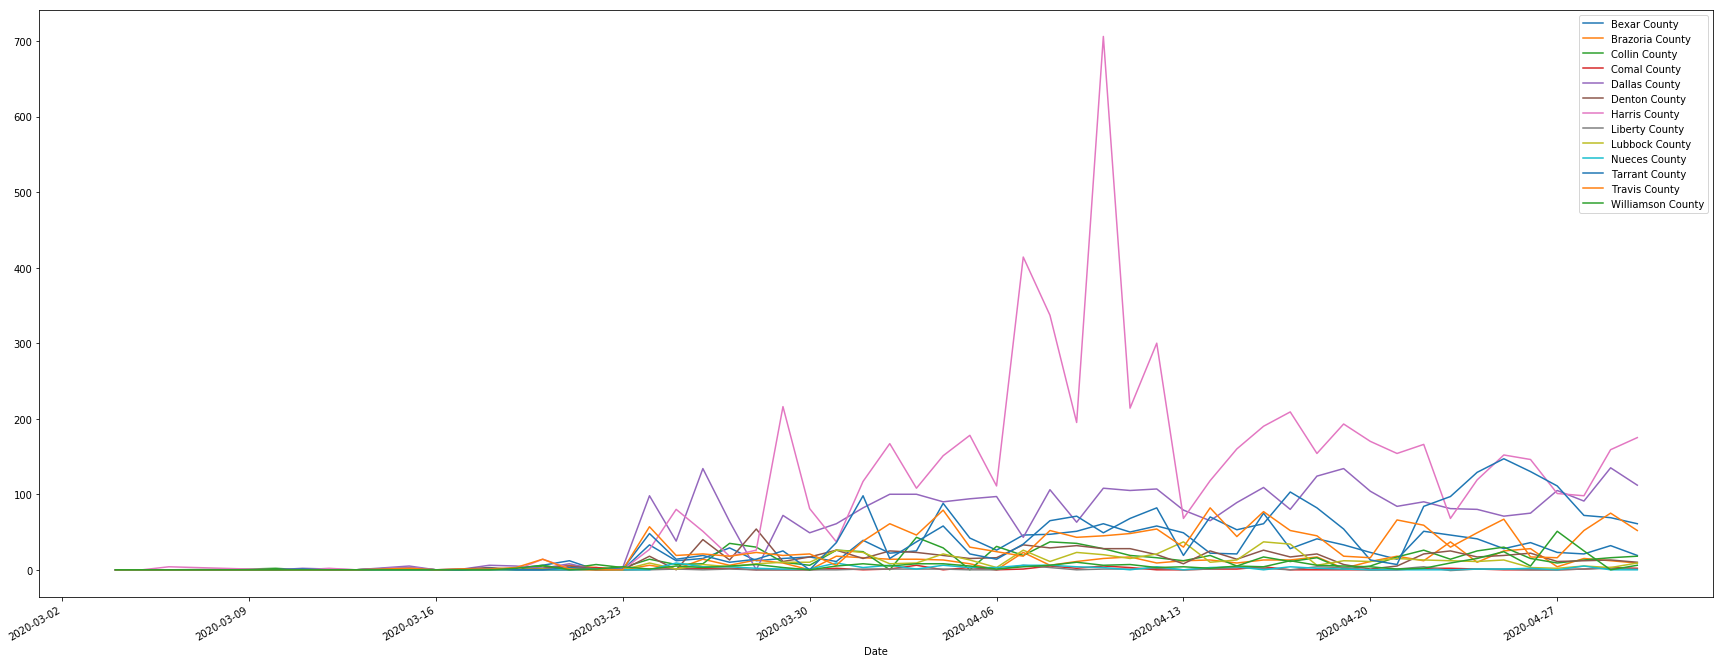

In [23]:
fig, ax = plt.subplots(figsize=(30,12))
grouped = FebApril_Shutdown_cases.groupby('County')
for key, group in grouped:
    group.plot(ax=ax, kind='line', x='Date', y='New Cases', label=key)

plt.show()

(array([ 737486.,  737493.,  737500.,  737507.,  737514.,  737521.,
         737528.,  737535.,  737542.]), <a list of 9 Text xticklabel objects>)

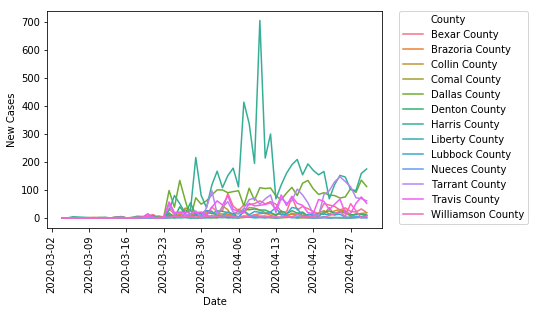

In [24]:
#FebApril_Shutdown_cases.groupby('County').plot(kind='scatter', x='Date', y='New Cases')
sns.lineplot(x='Date', y='New Cases', data=FebApril_Shutdown_cases, hue='County')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
#sns.scatterplot(x='Date', y='New Cases', data=FebApril_Shutdown_cases[FebApril_Shutdown_cases['County']=='Dallas County'])

(array([ 737497.,  737504.,  737511.,  737518.,  737525.,  737532.,
         737539.,  737546.]), <a list of 8 Text xticklabel objects>)

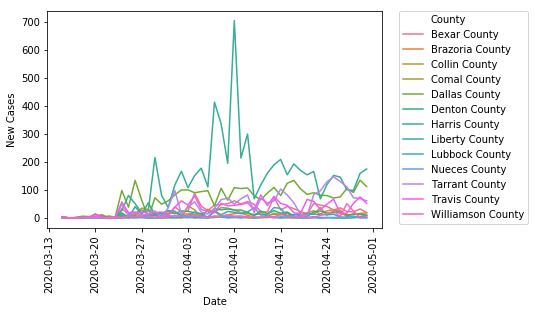

In [25]:
sns.lineplot(x='Date', y='New Cases', data=FebApril_Shutdown_cases[FebApril_Shutdown_cases['Date'] > '2020-03-13'], hue='County')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

(array([ 737497.,  737504.,  737511.,  737518.,  737525.,  737532.,
         737539.,  737546.]), <a list of 8 Text xticklabel objects>)

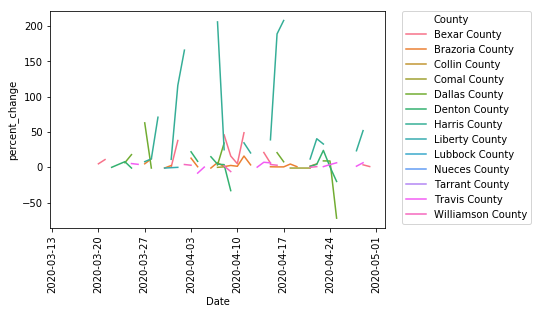

In [27]:
sns.lineplot(x='Date', y='percent_change', data=FebApril_Shutdown_cases[FebApril_Shutdown_cases['Date'] > '2020-03-13'], hue='County')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

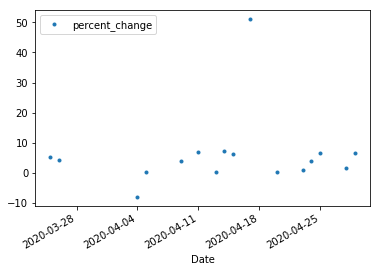

In [43]:
 FebApril_Shutdown_cases[ FebApril_Shutdown_cases['County']=='Travis County'].plot(x='Date', y='percent_change', style=".")


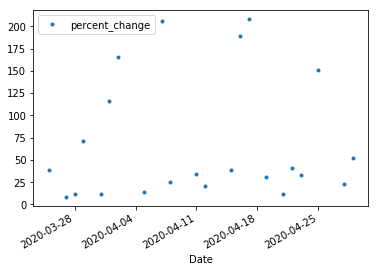

In [44]:
FebApril_Shutdown_cases[ FebApril_Shutdown_cases['County']=='Harris County'].plot(x='Date', y='percent_change', style=".")

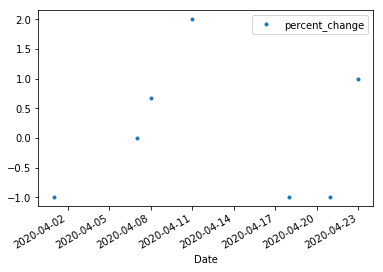

In [41]:
 df_county_cases[(df_county_cases['County']=='Comal County') & (df_county_cases['Date']> '2020-02-13') &(df_county_cases['Date']<'2020-05-01')].plot(x='Date', y='percent_change', style=".")

In [ ]:
sns.lineplot(x='Date', y='New Cases', data=FebApril_Shutdown_cases[(FebApril_Shutdown_cases['Date'] > '2020-03-13') & 
                                                                 (FebApril_Shutdown_cases['County'] != ' Harris County')], hue='County')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

Text(0.5,1,'Shutdown Counties Percent Change of Daily New Covid Cases')

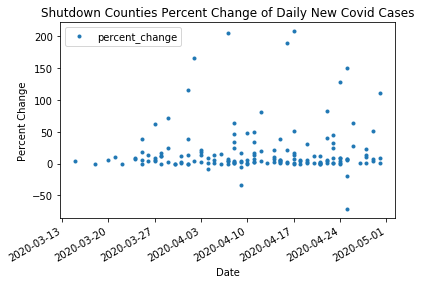

In [48]:
FebApril_Shutdown_cases.plot(x='Date', y='percent_change', style=".")
plt.ylabel('Percent Change')
plt.title('Shutdown Counties Percent Change of Daily New Covid Cases')

In [ ]:
Shutdown_cases.groupby('County').sum()

In [ ]:
Shutdown_cases[Shutdown_cases['County']=='Tarrant County'].tail()

In [ ]:
#Focus on Texas Metroplex Counties
Austin_Metroplex =  ['Bastrop County','Caldwell County','Hays County','Travis County','Williamson County']
Dallas_Metroplex = ['Collin County', 'Dallas County', 'Denton County', 'Ellis County', 'Hood County', 'Hunt County', 'Johnson County', 'Kaufman County', 'Parker County', 'Rockwall County', 'Somervell County', 'Tarrant County', 'Wise County']
Houston_Metroplex = ['Austin County', 'Brazoria County', 'Chambers County', 'Fort Bend County', 'Galveston County', 'Harris County', 'Liberty County', 'Montgomery County', 'Waller County']
San_Antonio_Metroplex = ['Atascosa County','Bandera County','Bexar County','Comal County','Guadalupe County','Kendall County','Medina County','Wilson County']


In [ ]:
county_covid = Spec_counties.groupby(['County', 'Date'], as_index=False)

In [ ]:
FebApril

In [ ]:

FebApril_cases[FebApril_cases['County'] == 'Tarrant County'].plot(kind='scatter',x='Date',y='New Cases', rot=45)
plt.xlabel('Date')
plt.ylabel('New Cases')

In [ ]:
county = 'Tarrant County'
fig, ax=plt.subplots(figsize=(15,18), sharex=True, sharey=True)
scatter = sns.scatterplot(x=FebApril_cases.loc[FebApril_cases['County'] == county, 'Date'],
                        y=FebApril_cases.loc[FebApril_cases['County'] == county, 'percent_change'] )
#plt.title(str(county))
#plt.xticks(rotation=90)
#scatter.set(xlabel='Dates')
#scatter.set(xticklabels=[])
fig.suptitle('Daily Percent Change of New Covid Cases By County in Dallas Metroplex')


In [ ]:
#warnings. filterwarnings()
from collections import OrderedDict
#create plots to show trends for each county in Dallas Metroplex
fig, ax=plt.subplots(figsize=(15,18), sharex=True, sharey=True)
for i, county in enumerate(Dallas_Metroplex):
    plt.subplot(7,2,i+1)
    scatter = sns.scatterplot(x=FebApril_cases.loc[FebApril_cases['County'] == county, 'Date'],
                        y=FebApril_cases.loc[FebApril_cases['County'] == county, 'percent_change'], 
                                hue=FebApril_cases['County'])
    #customize the plot
   # line.get_legend().remove()
    plt.title(str(county))
    plt.xticks(rotation=90)
    scatter.set(xlabel=None)
    scatter.set(xticklabels=[])
    fig.suptitle('Daily Percent Change of New Covid Cases By County in Dallas Metroplex')
    plt.locator_params(axis='x', nbins=17)

    #we only want one legend instead of a legend in each subplot
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys())

## County Demographic Data

In [ ]:
#Info about the Texas Demographic Data
df_demo=pd.read_csv('../data/cc-est2019-alldata-48.csv')

In [ ]:
df_demo.head()

In [ ]:
# drop rows that have nothing to do with the year 2019 ... i.e. year = 12
df_demo_2019 = df_demo[df_demo['YEAR']== 11]
# drop columns that are unnecessary
df_demo_2019.drop(['SUMLEV', 'STATE', 'STNAME'], axis=1, inplace=True)

In [ ]:
df_demo_shutdown = df_demo[df_demo['CTYNAME'].isin(shutdown_counties)]

In [ ]:
df_demo_shutdown.groupby(['CTYNAME']).sum()

In [ ]:
sums = df_demo_shutdown['CTYNAME'].groupby(df.Sex).sum()
axis('equal');
pie(sums, labels=sums.index);
show()